# STEP 1: PROBLEM STATEMENT
Goal & Expectation
The expectation of this full-day hackathon is to create a solution that predicts deviation of submissions. Three options for deviation prediction: 
- Predict Low or High Deviation
- Predict Deviation Value
- Predict Deviation Percentage 
# Tasks
Choose one of the three options above and define the methodology to predict it. You have the liberty of choosing the implementation of your solution - i.e. a simple rule based model, a Machine Learning model etc. 
Evaluate the model (check the accuracy of the model)
At the end of the day, present the result of your work and the next steps. 


# STEP #2: IMPORTING DATA and LIBRARIES

In [83]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline

In [3]:
data = pd.read_csv('deviation.csv')
data

,TAX_YEAR,ESTIMATED_REFUND,ACTUAL_REFUND,USER_ID,YEAR,MARITAL_STATUS,CHILDREN,OCCUPATION,OTHER_INCOME,BIRTHDATE,...,EXCEPTIONAL_EXPENSES,CHURCH_TAX_SPECIAL_EXPENSE,ALLOWANCES_SINGLE_PARENT,RIESTER,DONATIONS,SUBMISSION_ID,IS_MANDATORY,SUBMISSION_NR,IS_OVERALL_RETENTION,IS_LUMP_SUM
0,2019,473.18,470.29,1146579,2019.0,SINGLE,False,"[""EMPLOYEE""]","[""No""]",1992-11-19,...,0.0,672.0,0.0,744.956455,0.0,307768,0,1,0,no
1,2019,205.18,222.25,1068985,2019.0,SINGLE,False,"[""EMPLOYEE""]","[""No""]",1983-09-03,...,0.0,610.0,0.0,0.000000,0.0,283262,0,1,0,no
2,2018,273.46,216.19,1092590,2018.0,SINGLE,False,"[""EMPLOYEE""]","[""No""]",1995-10-26,...,0.0,381.0,0.0,0.000000,0.0,291871,0,3,0,no
3,2019,79.35,80.00,947869,2019.0,SINGLE,False,"[""EMPLOYEE"",""STUDENT""]","[""No""]",2001-06-17,...,0.0,0.0,0.0,0.000000,240.0,273439,0,2,0,no
4,2019,880.09,903.08,471739,2019.0,SINGLE,False,"[""EMPLOYEE""]","[""No""]",1981-08-05,...,0.0,0.0,0.0,0.000000,150.0,347335,0,2,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166501,2019,2027.75,2035.61,1214154,2019.0,SINGLE,False,"[""EMPLOYEE""]","[""No""]",1991-12-10,...,0.0,569.0,0.0,0.000000,0.0,330559,0,1,0,no
166502,2018,135.45,137.05,911819,2018.0,SINGLE,False,"[""EMPLOYEE""]","[""Other capital gains""]",1973-12-20,...,0.0,0.0,0.0,0.000000,128.0,240921,0,4,0,no
166503,2017,0.00,0.00,933279,2017.0,SINGLE,True,"[""Parental/maternity leave""]","[""No""]",1989-03-06,...,0.0,0.0,0.0,0.000000,0.0,344584,1,2,0,yes
166504,2019,1028.86,17.86,925648,2019.0,SINGLE,False,"[""EMPLOYEE"",""NOT_WORKING""]","[""No""]",1986-01-16,...,0.0,0.0,0.0,0.000000,0.0,293874,1,1,0,no


In [4]:
data.shape

(166506, 29)

In [5]:
data.drop(['TAX_YEAR','YEAR','USER_ID','BIRTHDATE','SUBMISSION_ID','IS_OVERALL_RETENTION','SUBMISSION_NR' ], axis=1, inplace=True)  # This information since its not usefull for the prediction 

In [6]:
data.head()

,ESTIMATED_REFUND,ACTUAL_REFUND,MARITAL_STATUS,CHILDREN,OCCUPATION,OTHER_INCOME,FIRST_PERSON_INCOME,SECOND_PERSON_INCOME,TOTAL_INCOME,PROFESSIONAL_EXPENSES,...,WORK_EQUIPMENT_EXPENSE_PER_PERSON,BUSINESS_TRAVEL_EXPENSE_PER_PERSON,OTHER_SPECIAL_EXPENSES,EXCEPTIONAL_EXPENSES,CHURCH_TAX_SPECIAL_EXPENSE,ALLOWANCES_SINGLE_PARENT,RIESTER,DONATIONS,IS_MANDATORY,IS_LUMP_SUM
0,473.18,470.29,SINGLE,False,"[""EMPLOYEE""]","[""No""]",44152.0,NaN,44152.0,1000.0,...,110.0,0.0,672.0,0.0,672.0,0.0,744.956455,0.0,0,no
1,205.18,222.25,SINGLE,False,"[""EMPLOYEE""]","[""No""]",44719.0,NaN,44719.0,1000.0,...,110.0,0.0,610.0,0.0,610.0,0.0,0.000000,0.0,0,no
2,273.46,216.19,SINGLE,False,"[""EMPLOYEE""]","[""No""]",31389.0,NaN,31389.0,1409.0,...,110.0,0.0,381.0,0.0,381.0,0.0,0.000000,0.0,0,no
3,79.35,80.00,SINGLE,False,"[""EMPLOYEE"",""STUDENT""]","[""No""]",12425.0,NaN,12425.0,1525.0,...,110.0,0.0,240.0,0.0,0.0,0.0,0.000000,240.0,0,no
4,880.09,903.08,SINGLE,False,"[""EMPLOYEE""]","[""No""]",36040.0,NaN,36040.0,3578.0,...,678.0,900.0,150.0,0.0,0.0,0.0,0.000000,150.0,0,no


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166506 entries, 0 to 166505
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ESTIMATED_REFUND                     166506 non-null  float64
 1   ACTUAL_REFUND                        166506 non-null  float64
 2   MARITAL_STATUS                       162800 non-null  object 
 3   CHILDREN                             162804 non-null  object 
 4   OCCUPATION                           162288 non-null  object 
 5   OTHER_INCOME                         162469 non-null  object 
 6   FIRST_PERSON_INCOME                  166505 non-null  float64
 7   SECOND_PERSON_INCOME                 14841 non-null   float64
 8   TOTAL_INCOME                         166505 non-null  float64
 9   PROFESSIONAL_EXPENSES                166505 non-null  float64
 10  DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON  166505 non-null  float64
 11  HOME_OFFICE_E

In [7]:
data.describe()

,ESTIMATED_REFUND,ACTUAL_REFUND,FIRST_PERSON_INCOME,SECOND_PERSON_INCOME,TOTAL_INCOME,PROFESSIONAL_EXPENSES,DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON,HOME_OFFICE_EXPENSE_PER_PERSON,WORK_EQUIPMENT_EXPENSE_PER_PERSON,BUSINESS_TRAVEL_EXPENSE_PER_PERSON,OTHER_SPECIAL_EXPENSES,EXCEPTIONAL_EXPENSES,CHURCH_TAX_SPECIAL_EXPENSE,ALLOWANCES_SINGLE_PARENT,RIESTER,DONATIONS,IS_MANDATORY
count,1.665060e+05,166506.000000,1.665050e+05,1.484100e+04,1.665050e+05,166505.000000,166505.000000,166505.000000,166505.000000,166505.000000,1.665050e+05,166505.000000,1.665050e+05,166505.000000,166505.000000,166505.000000,166506.00000
mean,1.702929e+05,545.200803,3.172413e+04,1.129254e+04,3.256922e+04,1931.930216,16.228442,5.067830,236.212852,100.257181,5.314130e+05,72.940600,5.395630e+05,84.731906,103.246652,23.840922,0.20923
std,5.135250e+07,709.797237,7.289867e+05,1.933859e+04,7.268525e+05,1917.537813,336.057386,87.150108,334.568493,2097.406209,2.167114e+08,500.052518,2.167375e+08,398.115043,373.110572,172.726627,0.40676
min,-1.361855e+08,-23286.650000,-6.423100e+04,-1.360100e+04,0.000000e+00,0.000000,0.000000,0.000000,110.000000,-674800.000000,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000
25%,1.794400e+02,142.000000,1.556200e+04,0.000000e+00,1.559900e+04,1000.000000,0.000000,0.000000,110.000000,0.000000,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000
50%,4.484050e+02,381.015000,2.717400e+04,3.481000e+03,2.745500e+04,1258.000000,0.000000,0.000000,110.000000,0.000000,7.200000e+01,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.00000
75%,8.847425e+02,765.930000,3.787500e+04,1.956200e+04,3.868400e+04,2282.000000,0.000000,0.000000,227.000000,0.000000,3.780000e+02,0.000000,2.950000e+02,0.000000,0.000000,0.000000,0.00000
max,1.985911e+10,16947.300000,2.868992e+08,1.526274e+06,2.868992e+08,247086.000000,27435.000000,5686.000000,57581.000000,89220.000000,8.842915e+10,102540.740000,8.842915e+10,3108.000000,4200.000000,11092.000000,1.00000


In [70]:
data.isnull().sum()

ESTIMATED_REFUND                            0
ACTUAL_REFUND                               0
MARITAL_STATUS                           3706
CHILDREN                                 3702
OCCUPATION                               4218
OTHER_INCOME                             4037
FIRST_PERSON_INCOME                         1
SECOND_PERSON_INCOME                   151665
TOTAL_INCOME                                1
PROFESSIONAL_EXPENSES                       1
DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON         1
HOME_OFFICE_EXPENSE_PER_PERSON              1
WORK_EQUIPMENT_EXPENSE_PER_PERSON           1
BUSINESS_TRAVEL_EXPENSE_PER_PERSON          1
OTHER_SPECIAL_EXPENSES                      1
EXCEPTIONAL_EXPENSES                        1
CHURCH_TAX_SPECIAL_EXPENSE                  1
ALLOWANCES_SINGLE_PARENT                    1
RIESTER                                     1
DONATIONS                                   1
IS_MANDATORY                                0
IS_LUMP_SUM                       

# STEP 3: DATA CLEANING
Data contains alot of missing values input error will clean the data and visualize afterwards 

In [71]:
data.MARITAL_STATUS.value_counts()

SINGLE              129417
MARRIED              20910
DIVORCED             10352
It's complicated      1918
WIDOWED                203
Name: MARITAL_STATUS, dtype: int64

In [8]:
data.MARITAL_STATUS.isnull().sum()

3706

In [9]:
data.MARITAL_STATUS.fillna('SINGLE', inplace=True)
#We have 3706 missing values mostly of the null values will be single Users and I will fill the missing value here with Single since its the model values 

In [10]:
data.CHILDREN.value_counts()

False    118354
True      44450
Name: CHILDREN, dtype: int64

In [11]:
data.CHILDREN.isnull().sum()

3702

In [12]:
#Alot of missing value here but in real word people with null children will probably be also false so i will fill this null to false and secondly its is the most occurence value
data.CHILDREN.fillna(False,inplace=True)

In [13]:
#I will drop the missing value in the FIRST_PERSON_INCOME moreover its just a row
data.CHILDREN.dropna(inplace=True)
 

In [78]:
data.isnull().sum()

ESTIMATED_REFUND                            0
ACTUAL_REFUND                               0
MARITAL_STATUS                              0
CHILDREN                                    0
OCCUPATION                               4218
OTHER_INCOME                             4037
FIRST_PERSON_INCOME                         1
SECOND_PERSON_INCOME                   151665
TOTAL_INCOME                                1
PROFESSIONAL_EXPENSES                       1
DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON         1
HOME_OFFICE_EXPENSE_PER_PERSON              1
WORK_EQUIPMENT_EXPENSE_PER_PERSON           1
BUSINESS_TRAVEL_EXPENSE_PER_PERSON          1
OTHER_SPECIAL_EXPENSES                      1
EXCEPTIONAL_EXPENSES                        1
CHURCH_TAX_SPECIAL_EXPENSE                  1
ALLOWANCES_SINGLE_PARENT                    1
RIESTER                                     1
DONATIONS                                   1
IS_MANDATORY                                0
IS_LUMP_SUM                       

In [14]:
data.FIRST_PERSON_INCOME.fillna(0,inplace=True)

In [15]:
data.OCCUPATION.value_counts()

["EMPLOYEE"]                                                    113075
["EMPLOYEE","STUDENT"]                                            6356
["IN_TRAINING"]                                                   5934
["EMPLOYEE","NOT_WORKING"]                                        4804
["NOT_WORKING"]                                                   3834
                                                                 ...  
["STUDENT","EMPLOYEE","NOT_WORKING","IN_TRAINING"]                   1
["OWN_BUSINESS","Parental/maternity leave"]                          1
["EMPLOYEE","MINIJOB","STUDENT","Parental/maternity leave"]          1
["IN_TRAINING","STUDENT","MINIJOB","EMPLOYEE","NOT_WORKING"]         1
["EMPLOYEE","NOT_WORKING","STUDENT","IN_TRAINING"]                   1
Name: OCCUPATION, Length: 267, dtype: int64

In [16]:
#I will fill the missing value with not-working
data.OCCUPATION.fillna("NOT_WORKING",inplace=True)

In [17]:
# the [""] is affecting the data manupulation here and will also affect the encording also 

data['OCCUPATION'] = data['OCCUPATION'].str.replace(r'[^\w\s]+', '')
data['OTHER_INCOME'] = data['OTHER_INCOME'].str.replace(r'[^\w\s]+', '')

In [18]:
data.OCCUPATION.value_counts()

EMPLOYEE                                             113075
NOT_WORKING                                            8052
EMPLOYEESTUDENT                                        6356
IN_TRAINING                                            5934
EMPLOYEENOT_WORKING                                    4804
                                                      ...  
EMPLOYEENOT_WORKINGIN_TRAININGSTUDENT                     1
EMPLOYEEFREELANCERMINIJOBNOT_WORKING                      1
NOT_WORKINGSTUDENTIN_TRAINING                             1
Parentalmaternity leaveEMPLOYEENOT_WORKINGMINIJOB         1
IN_TRAININGEMPLOYEENOT_WORKINGSTUDENT                     1
Name: OCCUPATION, Length: 267, dtype: int64

In [19]:
data.OTHER_INCOME.value_counts()

No                                                  154935
Alimony pay                                           3879
Other capital gains                                   3333
Sale of property                                        89
LETTING                                                 69
Pension pay                                             61
NO                                                      31
Other capital gainsAlimony pay                          26
Alimony payOther capital gains                          16
Sale of propertyAlimony pay                             10
Other capital gainsPension pay                           4
Sale of propertyOther capital gains                      3
Alimony payLETTING                                       2
LETTINGPension pay                                       1
Alimony payPension pay                                   1
Pension paySale of property                              1
Other capital gainsSale of property                     

In [20]:
#filling the missing value
data['OTHER_INCOME'].fillna('No', inplace=True)

In [21]:
#the NO should be replace to No 
data['OTHER_INCOME'].replace(["NO"],'No',inplace=True)


In [22]:
#All the value with other income should be replaced to the value other calital gain we have alot of versions of it 
data['OTHER_INCOME'].replace(['Other capital gainsPension pay', 
'Sale of propertyOther capital gains',
'LETTINGOther capital gains',
'Other capital gainsSale of property',
'NOOther capital gains', 
'Pension payAlimony pay' ,
'LETTINGPension pay',
'LETTINGAlimony pay','Pension payOther capital gains',
'Pension paySale of property'],'Other capital gains',inplace=True)
data['OTHER_INCOME'].replace(["Other capital gains "],'Other capital gains',inplace=True)
#Doing same thing for Alimony here 
data['OTHER_INCOME'].replace(["Other capital gainsLETTINGPension payAlimony pay",'Alimony paySale of property','Alimony payPension pay','Alimony payLETTING','Sale of propertyAlimony pay','Alimony payOther capital gains','Other capital gainsAlimony pay'],'Other capital gains',inplace=True)



In [23]:
data.OTHER_INCOME.value_counts()

No                     159003
Alimony pay              3879
Other capital gains      3405
Sale of property           89
LETTING                    69
Pension pay                61
Name: OTHER_INCOME, dtype: int64

In [24]:
data.shape

(166506, 22)

In [25]:
data.OCCUPATION.value_counts()

EMPLOYEE                                             113075
NOT_WORKING                                            8052
EMPLOYEESTUDENT                                        6356
IN_TRAINING                                            5934
EMPLOYEENOT_WORKING                                    4804
                                                      ...  
EMPLOYEENOT_WORKINGIN_TRAININGSTUDENT                     1
EMPLOYEEFREELANCERMINIJOBNOT_WORKING                      1
NOT_WORKINGSTUDENTIN_TRAINING                             1
Parentalmaternity leaveEMPLOYEENOT_WORKINGMINIJOB         1
IN_TRAININGEMPLOYEENOT_WORKINGSTUDENT                     1
Name: OCCUPATION, Length: 267, dtype: int64

In [26]:
data['OCCUPATION'].replace(['STUDENTEMPLOYEE','STUDENTMINIJOBEMPLOYEE', 'STUDENTMINIJOB'],'EMPLOYEESTUDENT',inplace=True)
data['OCCUPATION'].replace(['NOT_WORKINGEMPLOYEE'],'EMPLOYEENOT_WORKING',inplace=True)
data['OCCUPATION'].replace(['EMPLOYEESTUDENTMINIJOB','STUDENTMINIJOBEMPLOYEE', 'STUDENTMINIJOB'],'STUDENT',inplace=True)

In [27]:
data.OCCUPATION.value_counts()

EMPLOYEE                                        113075
EMPLOYEESTUDENT                                  10170
NOT_WORKING                                       8052
IN_TRAINING                                       5934
EMPLOYEENOT_WORKING                               5468
                                                 ...  
IN_TRAININGParentalmaternity leaveMINIJOB            1
NOT_WORKINGMINIJOBIN_TRAINING                        1
Parentalmaternity leaveNOT_WORKINGFREELANCER         1
NOT_WORKINGEMPLOYEEParentalmaternity leave           1
IN_TRAININGEMPLOYEENOT_WORKINGSTUDENT                1
Name: OCCUPATION, Length: 262, dtype: int64

In [28]:
#since we have bunch of different versions of  other i will merge all the value_count lower than 300 to other values 
s=data.OCCUPATION.value_counts()
data['OCCUPATION'] = np.where(data['OCCUPATION'].isin(s.index[s < 300]), 'Other', data['OCCUPATION'])


In [29]:
data.OCCUPATION.value_counts()

EMPLOYEE                           113075
EMPLOYEESTUDENT                     10170
NOT_WORKING                          8052
IN_TRAINING                          5934
EMPLOYEENOT_WORKING                  5468
Other                                4877
EMPLOYEEMINIJOB                      3785
EMPLOYEEIN_TRAINING                  3358
STUDENT                              2244
IN_TRAININGEMPLOYEE                  1944
EMPLOYEEParentalmaternity leave      1938
MINIJOB                              1827
Parentalmaternity leave              1394
Parentalmaternity leaveEMPLOYEE       802
EMPLOYEEMINIJOBSTUDENT                673
MINIJOBSTUDENT                        660
MINIJOBEMPLOYEE                       305
Name: OCCUPATION, dtype: int64

In [30]:
data.head()

,ESTIMATED_REFUND,ACTUAL_REFUND,MARITAL_STATUS,CHILDREN,OCCUPATION,OTHER_INCOME,FIRST_PERSON_INCOME,SECOND_PERSON_INCOME,TOTAL_INCOME,PROFESSIONAL_EXPENSES,...,WORK_EQUIPMENT_EXPENSE_PER_PERSON,BUSINESS_TRAVEL_EXPENSE_PER_PERSON,OTHER_SPECIAL_EXPENSES,EXCEPTIONAL_EXPENSES,CHURCH_TAX_SPECIAL_EXPENSE,ALLOWANCES_SINGLE_PARENT,RIESTER,DONATIONS,IS_MANDATORY,IS_LUMP_SUM
0,473.18,470.29,SINGLE,False,EMPLOYEE,No,44152.0,NaN,44152.0,1000.0,...,110.0,0.0,672.0,0.0,672.0,0.0,744.956455,0.0,0,no
1,205.18,222.25,SINGLE,False,EMPLOYEE,No,44719.0,NaN,44719.0,1000.0,...,110.0,0.0,610.0,0.0,610.0,0.0,0.000000,0.0,0,no
2,273.46,216.19,SINGLE,False,EMPLOYEE,No,31389.0,NaN,31389.0,1409.0,...,110.0,0.0,381.0,0.0,381.0,0.0,0.000000,0.0,0,no
3,79.35,80.00,SINGLE,False,EMPLOYEESTUDENT,No,12425.0,NaN,12425.0,1525.0,...,110.0,0.0,240.0,0.0,0.0,0.0,0.000000,240.0,0,no
4,880.09,903.08,SINGLE,False,EMPLOYEE,No,36040.0,NaN,36040.0,3578.0,...,678.0,900.0,150.0,0.0,0.0,0.0,0.000000,150.0,0,no


In [31]:
#since second person as null inout probably just one person is working in the household i will fill the null values with 0 

data['SECOND_PERSON_INCOME'].fillna(0, inplace=True)


In [32]:

#using getdummies to represent the strings into value
datahot=pd.get_dummies(data=data, columns=['CHILDREN', 'MARITAL_STATUS','OCCUPATION','OTHER_INCOME','IS_LUMP_SUM'])

# STEP 2: VISUALIZE DATASET

In [33]:
datahot['ESTIMATED_REFUND'].value_counts() 

 0.00       7578
 187.80       11
 30.00        10
 218.00       10
-1.71          9
            ... 
 963.01        1
 479.62        1
 1504.24       1
 1011.88       1
 931.41        1
Name: ESTIMATED_REFUND, Length: 101924, dtype: int64

In [34]:
#based on the quideline of the that instant refund to users with estimated refund amount > 500EUR i will extima refund to 0 for false and 1 for true.
datahot['ESTIMATED_REFUND'] = np.where(datahot['ESTIMATED_REFUND']<= 499, 0, 1)

In [35]:
nonrefund = datahot[datahot['ESTIMATED_REFUND']==0]
refund = datahot[datahot['ESTIMATED_REFUND']==1]

In [36]:
refund.shape

(76978, 49)

In [37]:

print("Total =", len(datahot))
print( 'refund transactions percentage =', (1.*len(refund) / len(datahot) )*100,"%")
print( 'nonrefund transactions percentage =', (len(nonrefund) / len(datahot) )*100,"%")


Total = 166506
refund transactions percentage = 46.23136703782446 %
nonrefund transactions percentage = 53.76863296217553 %



#fig = plt.figure(figsize=(18,6))
fig.add_subplot(3,2,1)
sns.countplot(data['ESTIMATED_REFUND'])
fig.add_subplot(3,2,2)
sns.countplot(data['CHILDREN'])
fig.add_subplot(3,3)
sns.countplot(data['ESTIMATED_REFUND'])
fig.add_subplot(3,2,4)
sns.countplot(data['CHILDREN'])



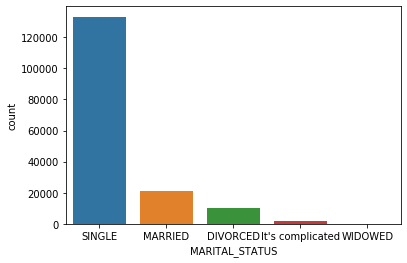

In [38]:
sns.countplot(data['MARITAL_STATUS'])
# Data is extremely balanceded

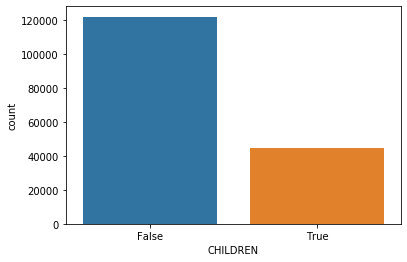

In [39]:
sns.countplot(data['CHILDREN'])

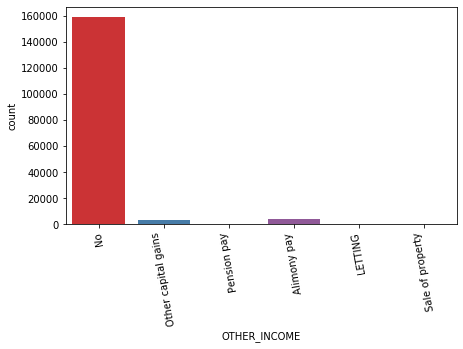

In [91]:
plt.figure(figsize=(7,4))
chart=sns.countplot(
    x='OTHER_INCOME',data=data,
    palette='Set1'
) 
chart.set_xticklabels(chart.get_xticklabels(),rotation=100);

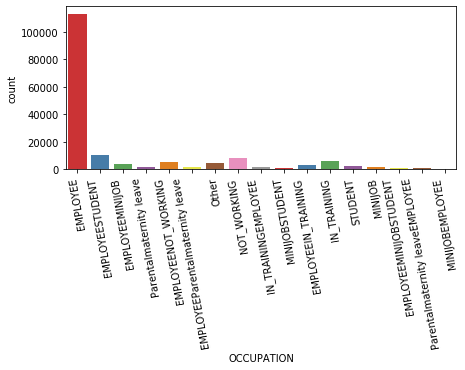

In [92]:
plt.figure(figsize=(7,3))
chart=sns.countplot(
    x='OCCUPATION',data=data,
    palette='Set1'
) 
chart.set_xticklabels(chart.get_xticklabels(),rotation=100);

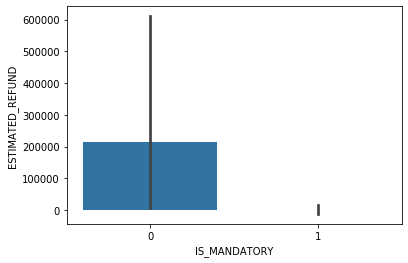

In [99]:
sns.barplot(x=data.IS_MANDATORY,y=data.ESTIMATED_REFUND)

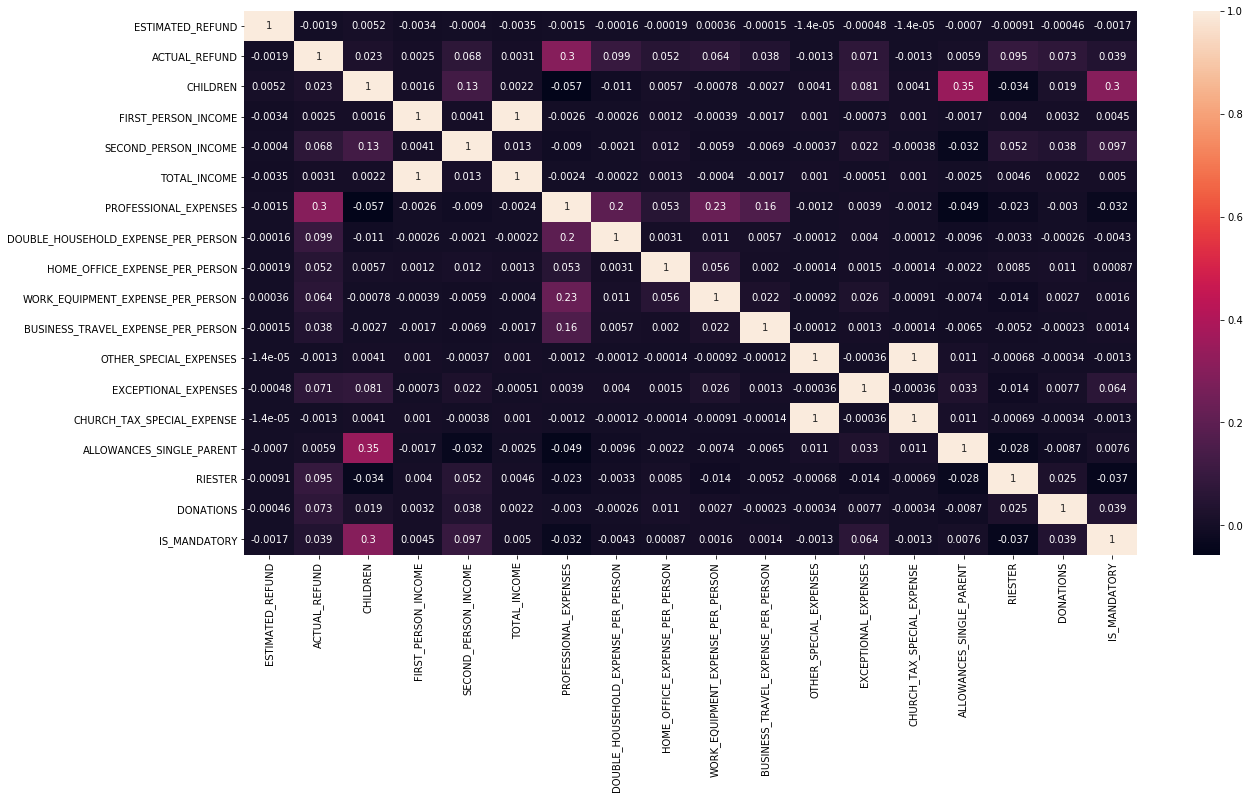

In [106]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True)
#data is corrected. 

In [107]:
#selecting features that are highly corrated and visulaize 

cor = datahot.corr()
cor[cor['ESTIMATED_REFUND'] > 0.06].index

num_cols=datahot[['ESTIMATED_REFUND', 'ACTUAL_REFUND', 'PROFESSIONAL_EXPENSES',
       'WORK_EQUIPMENT_EXPENSE_PER_PERSON', 'EXCEPTIONAL_EXPENSES', 'RIESTER',
       'IS_MANDATORY', 'OCCUPATION_EMPLOYEENOT_WORKING', 'IS_LUMP_SUM_no']]

In [108]:
refund.head()

,ESTIMATED_REFUND,ACTUAL_REFUND,FIRST_PERSON_INCOME,SECOND_PERSON_INCOME,TOTAL_INCOME,PROFESSIONAL_EXPENSES,DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON,HOME_OFFICE_EXPENSE_PER_PERSON,WORK_EQUIPMENT_EXPENSE_PER_PERSON,BUSINESS_TRAVEL_EXPENSE_PER_PERSON,...,OCCUPATION_Parentalmaternity leaveEMPLOYEE,OCCUPATION_STUDENT,OTHER_INCOME_Alimony pay,OTHER_INCOME_LETTING,OTHER_INCOME_No,OTHER_INCOME_Other capital gains,OTHER_INCOME_Pension pay,OTHER_INCOME_Sale of property,IS_LUMP_SUM_no,IS_LUMP_SUM_yes
4,1,903.08,36040.0,0.0,36040.0,3578.0,0.0,0.0,678.0,900.0,...,0,0,0,0,1,0,0,0,1,0
9,1,683.46,39758.0,0.0,39758.0,2810.0,0.0,0.0,110.0,0.0,...,0,0,0,0,1,0,0,0,1,0
10,1,220.72,9962.0,0.0,9962.0,1000.0,0.0,0.0,110.0,0.0,...,0,0,0,0,1,0,0,0,1,0
11,1,632.89,53963.0,0.0,53963.0,1320.0,0.0,0.0,110.0,1194.0,...,0,0,0,0,1,0,0,0,1,0
12,1,701.83,26834.0,0.0,26834.0,2760.0,0.0,0.0,110.0,0.0,...,0,0,0,0,0,1,0,0,1,0


In [41]:
datahot.drop(['ACTUAL_REFUND'], axis=1, inplace=True)

In [42]:
datahot.head()

,ESTIMATED_REFUND,FIRST_PERSON_INCOME,SECOND_PERSON_INCOME,TOTAL_INCOME,PROFESSIONAL_EXPENSES,DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON,HOME_OFFICE_EXPENSE_PER_PERSON,WORK_EQUIPMENT_EXPENSE_PER_PERSON,BUSINESS_TRAVEL_EXPENSE_PER_PERSON,OTHER_SPECIAL_EXPENSES,...,OCCUPATION_Parentalmaternity leaveEMPLOYEE,OCCUPATION_STUDENT,OTHER_INCOME_Alimony pay,OTHER_INCOME_LETTING,OTHER_INCOME_No,OTHER_INCOME_Other capital gains,OTHER_INCOME_Pension pay,OTHER_INCOME_Sale of property,IS_LUMP_SUM_no,IS_LUMP_SUM_yes
0,0,44152.0,0.0,44152.0,1000.0,0.0,0.0,110.0,0.0,672.0,...,0,0,0,0,1,0,0,0,1,0
1,0,44719.0,0.0,44719.0,1000.0,0.0,0.0,110.0,0.0,610.0,...,0,0,0,0,1,0,0,0,1,0
2,0,31389.0,0.0,31389.0,1409.0,0.0,0.0,110.0,0.0,381.0,...,0,0,0,0,1,0,0,0,1,0
3,0,12425.0,0.0,12425.0,1525.0,0.0,0.0,110.0,0.0,240.0,...,0,0,0,0,1,0,0,0,1,0
4,1,36040.0,0.0,36040.0,3578.0,0.0,0.0,678.0,900.0,150.0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
datahot.dropna(inplace=True)

In [43]:
datahot

,ESTIMATED_REFUND,FIRST_PERSON_INCOME,SECOND_PERSON_INCOME,TOTAL_INCOME,PROFESSIONAL_EXPENSES,DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON,HOME_OFFICE_EXPENSE_PER_PERSON,WORK_EQUIPMENT_EXPENSE_PER_PERSON,BUSINESS_TRAVEL_EXPENSE_PER_PERSON,OTHER_SPECIAL_EXPENSES,...,OCCUPATION_Parentalmaternity leaveEMPLOYEE,OCCUPATION_STUDENT,OTHER_INCOME_Alimony pay,OTHER_INCOME_LETTING,OTHER_INCOME_No,OTHER_INCOME_Other capital gains,OTHER_INCOME_Pension pay,OTHER_INCOME_Sale of property,IS_LUMP_SUM_no,IS_LUMP_SUM_yes
0,0,44152.0,0.0,44152.0,1000.0,0.0,0.0,110.0,0.0,672.0,...,0,0,0,0,1,0,0,0,1,0
1,0,44719.0,0.0,44719.0,1000.0,0.0,0.0,110.0,0.0,610.0,...,0,0,0,0,1,0,0,0,1,0
2,0,31389.0,0.0,31389.0,1409.0,0.0,0.0,110.0,0.0,381.0,...,0,0,0,0,1,0,0,0,1,0
3,0,12425.0,0.0,12425.0,1525.0,0.0,0.0,110.0,0.0,240.0,...,0,0,0,0,1,0,0,0,1,0
4,1,36040.0,0.0,36040.0,3578.0,0.0,0.0,678.0,900.0,150.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166501,1,34830.0,0.0,34830.0,6208.0,0.0,0.0,110.0,0.0,569.0,...,0,0,0,0,1,0,0,0,1,0
166502,0,44940.0,0.0,44940.0,1000.0,0.0,0.0,110.0,0.0,128.0,...,0,0,0,0,0,1,0,0,1,0
166503,0,1520.0,0.0,1520.0,1000.0,0.0,0.0,110.0,0.0,36.0,...,0,0,0,0,1,0,0,0,0,1
166504,1,14598.0,0.0,14598.0,2049.0,0.0,0.0,272.0,0.0,36.0,...,0,0,0,0,1,0,0,0,1,0


# STEP 5 MODEL TRAINING

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import sklearn.preprocessing as preproc

In [53]:
X=datahot.drop(['ESTIMATED_REFUND'], axis=1)
y=datahot['ESTIMATED_REFUND']

In [55]:
X.isnull().sum()

FIRST_PERSON_INCOME                           0
SECOND_PERSON_INCOME                          0
TOTAL_INCOME                                  0
PROFESSIONAL_EXPENSES                         0
DOUBLE_HOUSEHOLD_EXPENSE_PER_PERSON           0
HOME_OFFICE_EXPENSE_PER_PERSON                0
WORK_EQUIPMENT_EXPENSE_PER_PERSON             0
BUSINESS_TRAVEL_EXPENSE_PER_PERSON            0
OTHER_SPECIAL_EXPENSES                        0
EXCEPTIONAL_EXPENSES                          0
CHURCH_TAX_SPECIAL_EXPENSE                    0
ALLOWANCES_SINGLE_PARENT                      0
RIESTER                                       0
DONATIONS                                     0
IS_MANDATORY                                  0
CHILDREN_False                                0
CHILDREN_True                                 0
MARITAL_STATUS_DIVORCED                       0
MARITAL_STATUS_It's complicated               0
MARITAL_STATUS_MARRIED                        0
MARITAL_STATUS_SINGLE                   

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
abc_clf = AdaBoostClassifier()
nnn_clf = KNeighborsClassifier()
gbc_clf=GradientBoostingClassifier()
xgb_clf=XGBClassifier()

In [117]:
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('abc', abc_clf), ('nnn', nnn_clf),('gbc', gbc_clf),('xgb', xgb_clf) ],
voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

LogisticRegression               precision    recall  f1-score   support

           0       0.71      0.51      0.59     22467
           1       0.57      0.76      0.65     19160

    accuracy                           0.62     41627
   macro avg       0.64      0.63      0.62     41627
weighted avg       0.64      0.62      0.62     41627

RandomForestClassifier               precision    recall  f1-score   support

           0       0.83      0.86      0.85     22467
           1       0.83      0.80      0.82     19160

    accuracy                           0.83     41627
   macro avg       0.83      0.83      0.83     41627
weighted avg       0.83      0.83      0.83     41627

VotingClassifier               precision    recall  f1-score   support

           0       0.79      0.91      0.85     22467
           1       0.87      0.72      0.79     19160

    accuracy                           0.82     41627
   macro avg       0.83      0.81      0.82     41627
weighted avg   

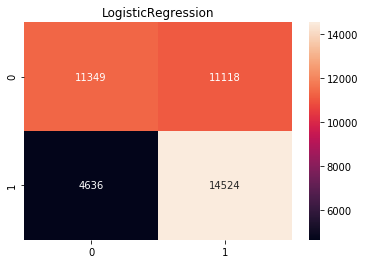

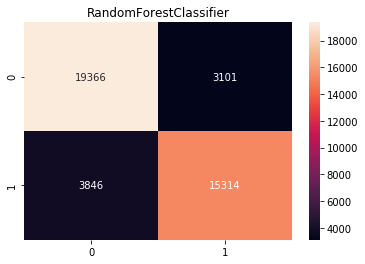

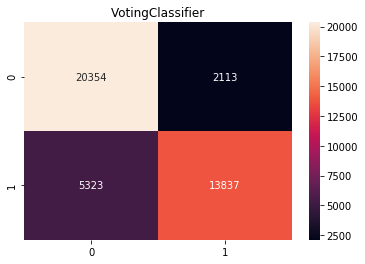

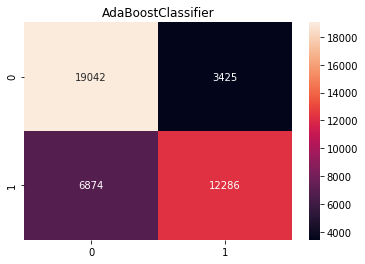

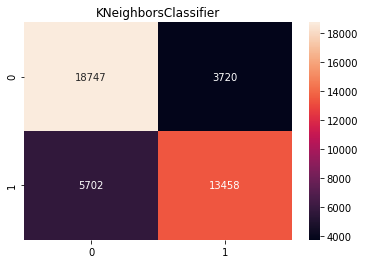

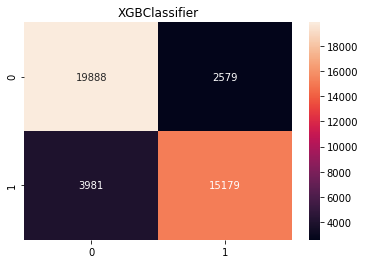

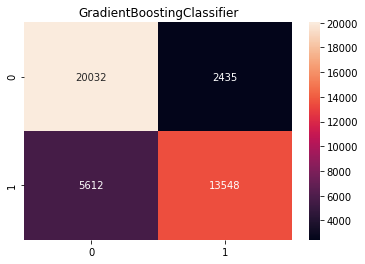

In [127]:
for clf in (log_clf, rnd_clf,  voting_clf,abc_clf, nnn_clf,xgb_clf,gbc_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    plt.figure()
    plt.title(clf.__class__.__name__)
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,label=clf.__class__.__name__,fmt='d')
    print(clf.__class__.__name__,classification_report(y_test, y_pred))

# Step 6. Model improvement and scaling 

# 1. using preproc

In [56]:
#I will be using three different scalling methods to improve my model 
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)

In [57]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.20,random_state=0)

In [60]:
voting_clf2 = VotingClassifier(
estimators=[('rf', rnd_clf), ('gbc', gbc_clf),('xgb', xgb_clf) ],
voting='hard'
)
voting_clf2.fit(X_train2, y_train2)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

RandomForestClassifier               precision    recall  f1-score   support

           0       0.84      0.87      0.85     17873
           1       0.84      0.81      0.82     15428

    accuracy                           0.84     33301
   macro avg       0.84      0.84      0.84     33301
weighted avg       0.84      0.84      0.84     33301

GradientBoostingClassifier               precision    recall  f1-score   support

           0       0.80      0.88      0.84     17873
           1       0.84      0.75      0.79     15428

    accuracy                           0.82     33301
   macro avg       0.82      0.81      0.82     33301
weighted avg       0.82      0.82      0.82     33301

VotingClassifier               precision    recall  f1-score   support

           0       0.83      0.89      0.86     17873
           1       0.86      0.79      0.82     15428

    accuracy                           0.84     33301
   macro avg       0.85      0.84      0.84     33301
weighte

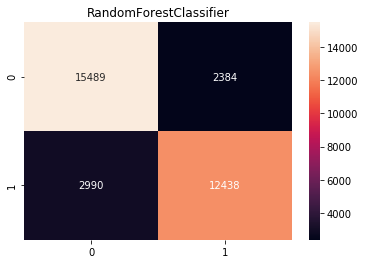

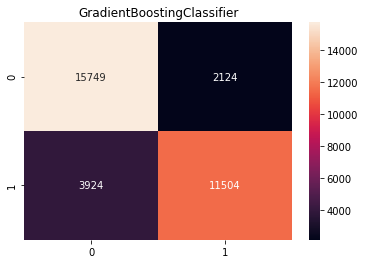

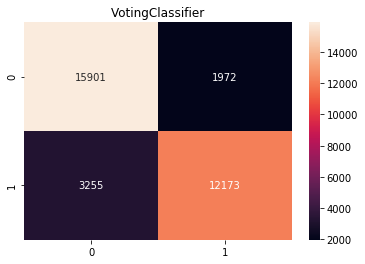

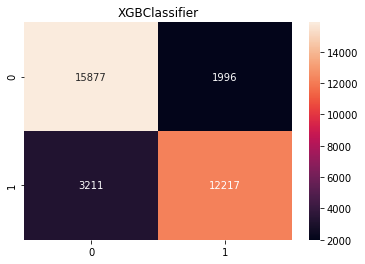

In [61]:
for clf in ( rnd_clf,gbc_clf,  voting_clf2,xgb_clf):
    clf.fit(X_train2, y_train2)
    y_pred2 = clf.predict(X_test2)
    plt.figure()
    plt.title(clf.__class__.__name__)
    sns.heatmap(confusion_matrix(y_test2, y_pred2),annot=True,label=clf.__class__.__name__,fmt='d')
    print(clf.__class__.__name__,classification_report(y_test2, y_pred2))

# 2. using Standard scalling 

In [62]:

Scaler2=StandardScaler()
Scaler2.fit(X)
X3 = Scaler2.transform(X)

In [63]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.20,random_state=0)

In [64]:
voting_clf3 = VotingClassifier(
estimators=[('rf', rnd_clf), ('gbc', gbc_clf),('xgb', xgb_clf) ],
voting='hard'
)
voting_clf3.fit(X_train3, y_train3)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

RandomForestClassifier               precision    recall  f1-score   support

           0       0.82      0.85      0.83     17873
           1       0.82      0.78      0.80     15428

    accuracy                           0.82     33301
   macro avg       0.82      0.82      0.82     33301
weighted avg       0.82      0.82      0.82     33301

GradientBoostingClassifier               precision    recall  f1-score   support

           0       0.76      0.84      0.80     17873
           1       0.79      0.69      0.74     15428

    accuracy                           0.77     33301
   macro avg       0.78      0.77      0.77     33301
weighted avg       0.77      0.77      0.77     33301

VotingClassifier               precision    recall  f1-score   support

           0       0.82      0.88      0.85     17873
           1       0.84      0.78      0.81     15428

    accuracy                           0.83     33301
   macro avg       0.83      0.83      0.83     33301
weighte

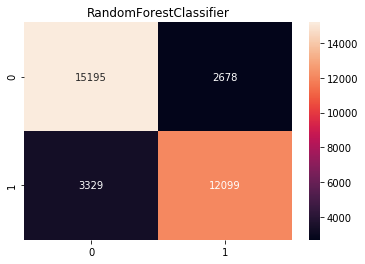

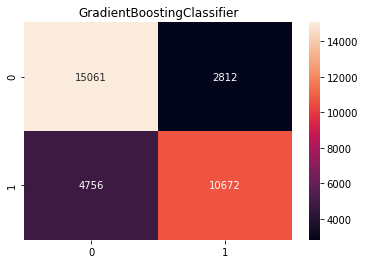

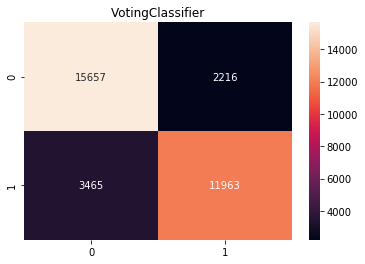

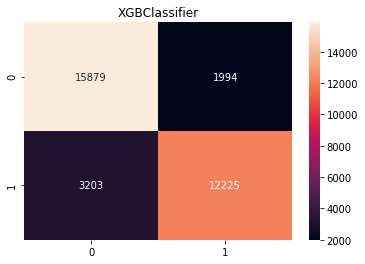

In [65]:
for clf in ( rnd_clf,gbc_clf,  voting_clf3,xgb_clf):
    clf.fit(X_train3, y_train3)
    y_pred3 = clf.predict(X_test3)
    plt.figure()
    plt.title(clf.__class__.__name__)
    sns.heatmap(confusion_matrix(y_test3, y_pred3),annot=True,label=clf.__class__.__name__,fmt='d')
    print(clf.__class__.__name__,classification_report(y_test3, y_pred3))

In [66]:
#3. using MinMaxScaler
Scaler3=MinMaxScaler()
Scaler3.fit(X)
X4 = Scaler3.transform(X)
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y,test_size=0.20,random_state=0)

In [67]:
voting_clf4 = VotingClassifier(
estimators=[('rf', rnd_clf), ('gbc', gbc_clf),('xgb', xgb_clf) ],
voting='hard'
)
voting_clf4.fit(X_train4, y_train4)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

RandomForestClassifier               precision    recall  f1-score   support

           0       0.79      0.81      0.80     17873
           1       0.77      0.75      0.76     15428

    accuracy                           0.78     33301
   macro avg       0.78      0.78      0.78     33301
weighted avg       0.78      0.78      0.78     33301

GradientBoostingClassifier               precision    recall  f1-score   support

           0       0.72      0.88      0.79     17873
           1       0.81      0.60      0.69     15428

    accuracy                           0.75     33301
   macro avg       0.76      0.74      0.74     33301
weighted avg       0.76      0.75      0.74     33301

VotingClassifier               precision    recall  f1-score   support

           0       0.79      0.88      0.83     17873
           1       0.84      0.73      0.78     15428

    accuracy                           0.81     33301
   macro avg       0.82      0.81      0.81     33301
weighte

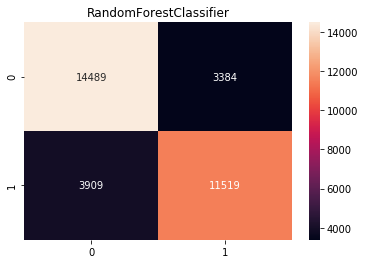

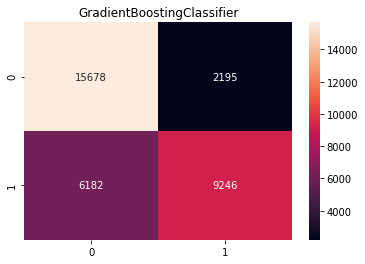

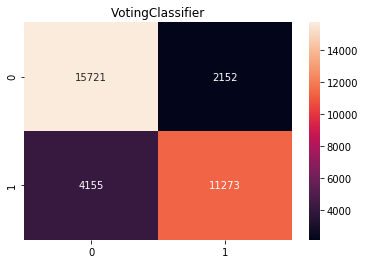

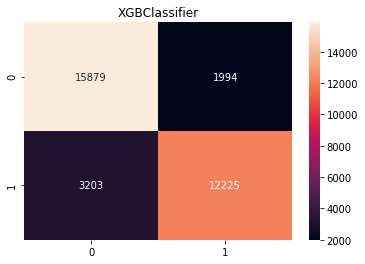

In [68]:
for clf in ( rnd_clf,gbc_clf,  voting_clf4,xgb_clf):
    clf.fit(X_train4, y_train4)
    y_pred4 = clf.predict(X_test4)
    plt.figure()
    plt.title(clf.__class__.__name__)
    sns.heatmap(confusion_matrix(y_test4, y_pred4),annot=True,label=clf.__class__.__name__,fmt='d')
    print( clf.__class__.__name__,classification_report(y_test4, y_pred4))

# End note 
- Graphs can be improved, Since most of the datas are well understanding from the findinds of the data teams i didnt pay alot of attention in visualization. 
- ML can be improved if the categories can be done in a better way.
- I dropped SVC model becauses its talking alot of time to load  and the prediction was not good its below 70% same to naive bayes but i concentrated on the models that works fine as local machine can be slow in fitting and making the predictions. 
- Thanks for the opputunity 